In [1]:
# this notebook follows on from make_visit_trajectories

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
pd.set_option('display.max_rows', 500)

In [3]:
filename = '../Data/big_cats/processed_data/grad_intercept_data_15_09_2021.csv'
total_df = pd.read_csv(filename)

### do train/test split

In [4]:
from sklearn.model_selection import train_test_split 
cols_x = list(total_df.columns)
cols_x.remove('ARKS Number')
cols_x.remove('CKD - cause of mortality')
X = total_df[cols_x].values
y = total_df['CKD - cause of mortality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

In [5]:
sum(y_train)/len(y_train)

0.3360655737704918

In [6]:
sum(y_test)/len(y_test)

0.3548387096774194

### Impute missing intercepts and gradients

In [7]:
imputer = KNNImputer(n_neighbors=2)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Random forest

In [8]:
import sklearn
sklearn.__version__

'0.24.2'

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=1000, random_state=0)

In [10]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(cols_x, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False) #.plot(kind='bar', rot=45)

,Gini-importance
biochem: Hypercreatininaemia?_intercept,0.037791
biochem: Hypercreatininaemia?_grad,0.029969
biochem: Creatinine (umol/L)_grad,0.026460
biochem: Low USG?_grad,0.020632
biochem: Total Plasma Protein (g/L)_grad,0.018578
haem: neutrophils (band)_intercept,0.016410
biochem: Low USG?_intercept,0.016240
biochem: Creatinine (umol/L)_intercept,0.016029
haem: neutrophils (band)_grad,0.015285
biochem: Serum Albumin (g/L)_grad,0.015056


In [11]:
importances['Gini-importance'].sum()

1.0

In [12]:
# do cross validation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
clf = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=4, scoring='f1_macro')
scores

array([0.69219858, 0.66304348, 0.6       , 0.48863636])

In [13]:
print(scores.mean())

0.6109696058643793


<div style='color: FloralWhite; padding: 2rem; background-image: radial-gradient(farthest-corner at 40px 40px,
      #008080 0%, #4fb 100%); font-weight: 500'>
<h2 style='padding: 0; margin-bottom: 1rem; margin-top:0;'> Next Steps </h2> 
<li> Look at correlations {done}</li>
<li> Do PCA then try to disentangle components {done} https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com {done}</li>
<li> Plot cumulative explained variance as function of number of PCs shown here https://medium.com/apprentice-journal/pca-application-in-machine-learning-4827c07a61db {done} </li>
<li> recreate step 2 here: https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/key-results/ {done}</li>
<li> Do a random forest using the 7 PCs!  {done} </li>
<li> Remake train, test, validation set CONTINUE HERE</li>
<li> Run validation for each of the 3 methods and compare results</li>
</div>


# PCA on grad/intercept 
What are the grads/intercepts that explain the most variance? 

In [14]:
import sklearn.datasets, sklearn.decomposition
X = X_train
mu = np.mean(X, axis=0)
X_PCA = X - mu

In [15]:
# test on 20 components to compare variance explained against number of components
num_components = 20
pca = sklearn.decomposition.PCA(num_components)
pca.fit(X_PCA)

PCA(n_components=20)

In [16]:
print(pca.explained_variance_ratio_)

[9.92859114e-01 7.13542017e-03 2.48574707e-06 1.50197599e-06
 5.48394992e-07 3.22401087e-07 2.35427217e-07 1.27969944e-07
 5.74455878e-08 5.29391189e-08 4.64048014e-08 2.24296496e-08
 1.48111806e-08 1.33051893e-08 1.11400979e-08 5.19369908e-09
 4.32433885e-09 4.01958559e-09 3.14459534e-09 1.75981871e-09]


In [17]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)
cum_sum

array([0.99285911, 0.99999453, 0.99999702, 0.99999852, 0.99999907,
       0.99999939, 0.99999963, 0.99999976, 0.99999981, 0.99999987,
       0.99999991, 0.99999994, 0.99999995, 0.99999996, 0.99999998,
       0.99999998, 0.99999998, 0.99999999, 0.99999999, 0.99999999])

Text(0, 0.5, 'variance explained')

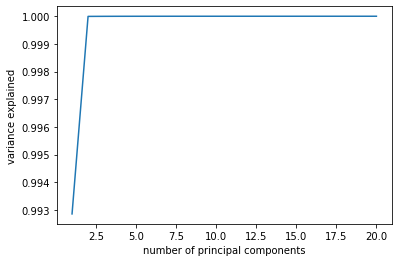

In [18]:
plt.plot(list(range(1, num_components+1)), cum_sum)
plt.xlabel('number of principal components')
plt.ylabel('variance explained')

In [19]:
# Elbow point is around 7 so decide to use 7 principal components

In [20]:
pca = sklearn.decomposition.PCA(7)
pca.fit(X_PCA)

PCA(n_components=7)

In [21]:
pca.components_.shape # (7 components, 153 features)

(7, 207)

In [22]:
pca.components_

array([[ 2.22044605e-16, -2.76316673e-07, -0.00000000e+00, ...,
        -2.21462759e-08,  7.19461487e-08, -6.98156966e-09],
       [ 8.60422844e-16,  1.99472952e-06, -0.00000000e+00, ...,
        -2.36470550e-07,  1.05342654e-06, -1.06224278e-07],
       [ 3.26648431e-15,  1.71825175e-04,  3.33066907e-16, ...,
        -7.66759185e-05, -5.11752491e-06,  2.33586996e-05],
       ...,
       [-3.19189120e-15, -1.37610040e-04, -2.77555756e-17, ...,
        -4.70013451e-05, -1.88779170e-05, -1.22617864e-05],
       [ 1.27647865e-15,  3.72759734e-04, -3.29597460e-17, ...,
         1.71756650e-06, -2.53984953e-05, -2.19507968e-05],
       [-1.63660318e-15, -2.46331912e-04, -2.08166817e-17, ...,
        -4.77458490e-05, -1.00067402e-05, -7.48233532e-06]])

In [23]:
len(cols_x)

207

In [24]:
df_pca = pd.DataFrame(pca.components_, columns=cols_x)
df_component_weights = df_pca.T
colnames = [f"PC{n+1}" for n in range(len(df_component_weights.columns))]
df_component_weights.columns = colnames

In [25]:
df_component_weights

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Sex_female_grad,2.220446e-16,8.604228e-16,3.266484e-15,-4.913713e-14,-3.191891e-15,1.276479e-15,-1.636603e-15
Sex_female_intercept,-2.763167e-07,1.994730e-06,1.718252e-04,-1.803619e-04,-1.376100e-04,3.727597e-04,-2.463319e-04
Species (common name)_African Lion_grad,-0.000000e+00,-0.000000e+00,3.330669e-16,2.775558e-17,-2.775558e-17,-3.295975e-17,-2.081668e-17
Species (common name)_African Lion_intercept,-1.100166e-07,4.216856e-06,-1.023059e-05,-9.056685e-05,-9.470944e-05,-1.103929e-04,-4.515161e-05
Species (common name)_Asiatic Lion_grad,-0.000000e+00,-0.000000e+00,0.000000e+00,-1.110223e-16,5.551115e-17,1.301043e-17,-4.857226e-17
Species (common name)_Asiatic Lion_intercept,-1.816442e-08,-2.669382e-07,-6.323238e-05,-1.516269e-05,-3.274064e-05,-2.346325e-06,-3.140259e-05
Species (common name)_Bengal Tiger (white)_grad,-0.000000e+00,-0.000000e+00,-1.084202e-19,-0.000000e+00,0.000000e+00,5.551115e-17,2.220446e-16
Species (common name)_Bengal Tiger (white)_intercept,-3.484135e-09,-5.437309e-08,-1.428954e-05,-3.062763e-06,-8.921411e-06,-2.471102e-07,-6.669664e-06
Species (common name)_Bengal Tiger_grad,-0.000000e+00,-0.000000e+00,1.058791e-22,-0.000000e+00,0.000000e+00,0.000000e+00,2.775558e-17
Species (common name)_Bengal Tiger_intercept,-1.404062e-08,-2.016557e-07,1.081724e-04,7.027276e-06,-4.040689e-05,-1.177444e-04,-1.502746e-05


In [26]:
top_5_feats = []
for c in df_component_weights.columns:
    print(c)
    df_component_weights['dummy']= abs(df_component_weights[c])
    top_5 = df_component_weights.sort_values(by='dummy', ascending=False)[c].head()
    print(top_5)
    # save top 5 to  list
    top_5_feats.extend(top_5.index)
# drop dummy col
df_component_weights.drop(columns=['dummy'], inplace=True)

PC1
urine: blood (Hb -Multistix)_grad        -0.836713
urine: blood (Hb -Multistix)_intercept    0.547620
urine: Epith cells_grad                   0.003922
urine: Epith cells_intercept             -0.002618
urine: glucose (Multistix)_grad          -0.000543
Name: PC1, dtype: float64
PC2
urine: blood (Hb -Multistix)_intercept    0.836404
urine: blood (Hb -Multistix)_grad         0.547439
usg_maxed_out_grad                        0.015291
urine: Organisms_grad                     0.015290
urine: Contaminants?_grad                 0.015290
Name: PC2, dtype: float64
PC3
urine: pH_grad                                -0.824308
urine: pH_intercept                            0.557074
urine: Epith cells_grad                        0.041041
biochem: Anaemic? <25_grad                    -0.039036
biochem: Hyperphosphataemia? >2_9 to 3_grad    0.037843
Name: PC3, dtype: float64
PC4
urine: Epith cells_grad        -0.712986
urine: Epith cells_intercept    0.475894
urine: Organisms_grad          -0.

In [27]:
top_pca_feats = list(set(top_5_feats))
top_pca_feats

['urine: glucose (Multistix)_grad',
 'urine: Epith cells_intercept',
 'urine: blood (Hb -Multistix)_intercept',
 'haem: RBC (x 10^12/L)_grad',
 'biochem: Hyperphosphataemia? >2_9 to 3_intercept',
 'urine: blood (Hb -Multistix)_grad',
 'usg_maxed_out_grad',
 'urine: pH_grad',
 'biochem: Hyperphosphataemia? >2_9 to 3_grad',
 'urine: Proteinuric UPC  greater 0:4_intercept',
 'biochem: Sodium (mmol/L)_grad',
 'haem: haemoglobin (g/L)_grad',
 'biochem: Anaemic? <25_grad',
 'biochem: Anaemic? <25_intercept',
 'urine: Proteinuric UPC  greater 0:4_grad',
 'urine: Contaminants?_grad',
 'haem: HCT (%)_grad',
 'urine: Organisms_grad',
 'haem: eosinophils (%)_grad',
 'haem: lymphocytes  (%)_grad',
 'urine: pH_intercept',
 'urine: Epith cells_grad']

# do a random forest on the 7 PCA components

In [28]:
# work out each cat's PC scores
pca_X_train = pca.transform(X_train)
pca_X_train.shape

(122, 7)

In [29]:
clf = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=10)
clf.fit(pca_X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=1000, random_state=10)

In [30]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(colnames, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False) #.plot(kind='bar', rot=45)

,Gini-importance
PC2,0.225638
PC7,0.144314
PC6,0.135143
PC5,0.133344
PC3,0.131508
PC1,0.116942
PC4,0.113110


In [31]:
# do cross validation
clf = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=10)
scores = cross_val_score(clf, pca_X_train, y_train, cv=4, scoring='f1_macro')
scores

array([0.60425532, 0.47320261, 0.54856361, 0.52380952])

In [32]:
print(scores.mean())

0.5374577672071632


## do a random forest on features that weighted highly in PCs (top 5)

In [33]:
X_train_df = pd.DataFrame(X_train, columns = cols_x)
pca_top5_X_train = X_train_df[top_pca_feats].values

In [34]:
# do cross validation
clf = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=90)
scores = cross_val_score(clf, pca_top5_X_train, y_train, cv=4, scoring='f1_macro')
scores

array([0.56200942, 0.44642857, 0.55810147, 0.46648427])

In [35]:
print(scores.mean())

0.5082559329254481


In [36]:
# try changing max_depth to 10
clf = RandomForestClassifier(max_depth=10, n_estimators = 1000, random_state=90)
scores = cross_val_score(clf, pca_top5_X_train, y_train, cv=4, scoring='f1_macro')
scores

array([0.56200942, 0.44642857, 0.55810147, 0.46648427])

In [37]:
print(scores.mean())

0.5082559329254481
